In [3]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)
sns.set_palette("Set1")

In [87]:
# >sp|P05130|KPC1_DROME Protein kinase C, brain isozyme OS=Drosophila melanogaster OX=7227 GN=Pkc53E PE=2 SV=2
# MSEGSDNNGDPQQQGAEGEAVGENKMKSRLRKGALKKKNVFNVKDHCFIARFFKQPTFCS
# HCKDFICGYQSGYAWMGFGKQGFQCQVCSYVVHKRCHEYVTFICPGKDKGIDSDSPKTQH
# NFEPFTYAGPTFCDHCGSLLYGIYHQGLKCSACDMNVHARCKENVPSLCGCDHTERRGRI
# YLEINVKENLLTVQIKEGRNLIPMDPNGLSDPYVKVKLIPDDKDQSKKKTRTIKACLNPV
# WNETLTYDLKPEDKDRRILIEVWDWDRTSRNDFMGALSFGISEIIKNPTNGWFKLLTQDE
# GEYYNVPCADDEQDLLKLKQKPSQKKPMVMRSDTNTHTSSKKDMIRATDFNFIKVLGKGS
# FGKVLLAERKGSEELYAIKILKKDVIIQDDDVECTMIEKRVLALGEKPPFLVQLHSCFQT
# MDRLFFVMEYVNGGDLMFQIQQFGKFKEPVAVFYAAEIAAGLFFLHTKGILYRDLKLDNV
# LLDADGHVKIADFGMCKENIVGDKTTKTFCGTPDYIAPEIILYQPYGKSVDWWAYGVLLY
# EMLVGQPPFDGEDEEELFAAITDHNVSYPKSLSKEAKEACKGFLTKQPNKRLGCGSSGEE
# DVRLHPFFRRIDWEKIENREVQPPFKPKIKHRKDVSNFDKQFTSEKTDLTPTDKVFMMNL
# DQSEFVGFSYMNPEYVFSP



In [4]:
def hydrophobicity_plot(seq, window):
    kd = {"A": 1.8, "R": -4.5, "N": -3.5, "D": -3.5, "C": 2.5,
      "Q": -3.5, "E": -3.5, "G": -0.4, "H": -3.2, "I": 4.5,
      "L": 3.8, "K": -3.9, "M": 1.9, "F": 2.8, "P": -1.6,
      "S": -0.8, "T": -0.7, "W": -0.9, "Y": -1.3, "V": 4.2}
    
    a = np.array([kd[i] for i in seq ])
    b = a.cumsum()
    b[window:] = b[window:] - b[:-window]
    return b


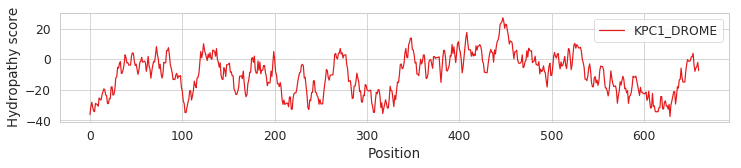

In [5]:
kpc1_drome = 'MSEGSDNNGDPQQQGAEGEAVGENKMKSRLRKGALKKKNVFNVKDHCFIARFFKQPTFCSHCKDFICGYQSGYAWMGFGKQGFQCQVCSYVVHKRCHEYVTFICPGKDKGIDSDSPKTQHNFEPFTYAGPTFCDHCGSLLYGIYHQGLKCSACDMNVHARCKENVPSLCGCDHTERRGRIYLEINVKENLLTVQIKEGRNLIPMDPNGLSDPYVKVKLIPDDKDQSKKKTRTIKACLNPVWNETLTYDLKPEDKDRRILIEVWDWDRTSRNDFMGALSFGISEIIKNPTNGWFKLLTQDEGEYYNVPCADDEQDLLKLKQKPSQKKPMVMRSDTNTHTSSKKDMIRATDFNFIKVLGKGSFGKVLLAERKGSEELYAIKILKKDVIIQDDDVECTMIEKRVLALGEKPPFLVQLHSCFQTMDRLFFVMEYVNGGDLMFQIQQFGKFKEPVAVFYAAEIAAGLFFLHTKGILYRDLKLDNVLLDADGHVKIADFGMCKENIVGDKTTKTFCGTPDYIAPEIILYQPYGKSVDWWAYGVLLYEMLVGQPPFDGEDEEELFAAITDHNVSYPKSLSKEAKEACKGFLTKQPNKRLGCGSSGEEDVRLHPFFRRIDWEKIENREVQPPFKPKIKHRKDVSNFDKQFTSEKTDLTPTDKVFMMNLDQSEFVGFSYMNPEYVFSP'
points = hydrophobicity_plot(kpc1_drome, 19)


plt.figure(figsize=(12, 2))
ax = sns.lineplot(list(range(len(points[19:]))), points[19:], label='KPC1_DROME')
ax.set_ylabel('Hydropathy score')
ax.set_xlabel('Position')
plt.savefig('figs/hydrophobicity.pdf', bbox_inches = 'tight', pad_inches = 0)